In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Functions, loops and branching

The following exercises let you practice Python syntax. Do not use any packages not in the [standard library](https://docs.python.org/3/library/) except for `matplotlib.pyplot` which has been imported for you.

If you have not done much programming, these exercises will be challenging. Don't give up! For this first exercise, solutions are provided, but try not to refer to them unless you are desperate.

**1**. Grading (20 points)

- Write a function to assign grades to a student such that 
```
A = [90 - 100]
B = [80 - 90)
C = [65 - 80)
D = [0, 65)
```

where square brackets indicate inclusive boundaries and parentheses indicate exclusive boundaries. However, studens whose attendance is 12 days or fewer get their grade reduced by one (A to B, B to C, C to D, and D stays D). The function should take a score and an attendance as an argument and return A, B, C or D as appropriate.(10 points)
- Count the number of students with each grade from the given scores. (10 points)

In [3]:
scores = [ 84,  76,  67,  23,  83,  23,  50, 100,  32,  84,  22,  41,  27,
        29,  71,  85,  47,  77,  39,  25,  85,  69,  22,  66, 100,  92,
        97,  46,  81,  88,  67,  20,  52,  62,  39,  36,  79,  54,  74,
        64,  33,  68,  85,  69,  84,  30,  68, 100,  71,  33,  21,  95,
        92,  72,  53,  50,  31,  82,  53,  68,  49,  37,  40,  21,  94,
        30,  54,  58,  92,  95,  73,  80,  81,  56,  44,  22,  69,  70,
        25,  50,  59,  32,  65,  79,  27,  62,  27,  31,  78,  88,  68,
        53,  79,  69,  89,  38,  80,  55,  92,  55]

attendances = [17, 19, 21, 14, 10, 20, 14,  9,  6, 21,  5, 23, 21,  4,  5, 21, 20,
        2, 14, 14, 21, 22,  3,  0, 11,  0,  0,  4, 20, 14, 23, 16, 24,  5,
       12, 11, 22, 20, 15, 23,  0, 20, 20,  6,  4, 14,  6, 18, 17,  0, 18,
        6,  3, 19, 24,  7,  9, 15, 18, 10,  2, 15, 21,  2,  9, 21, 20, 11,
       24, 23, 14, 22,  4, 12,  7, 19,  6, 18, 23,  6, 14,  6,  1, 12,  7,
       11, 22, 21,  7, 22, 24,  4, 10, 17, 21, 15,  0, 20,  3, 20]

In [5]:
# Your answer here

def grade(score, attendance):
    """Function that returns grade based on score and attendance."""
    if attendance > 12:
        if score >= 90:
            return 'A'
        elif score >= 80:
            return 'B'
        elif score >= 65:
            return 'C'
        else:
            return 'D'
    else:
        if score >= 90:
            return 'B'
        elif score >= 80:
            return 'C'
        else:
            return 'D'

counts = {}
for score, attendance in zip(scores, attendances):
    g = grade(score, attendance)
    counts[g] = counts.get(g, 0) + 1
    
for g in 'ABCD':
    print(g, counts[g])

A 3
B 19
C 17
D 61


**2**. The Henon map and chaos. (25 points)

The Henon map takes a pont $(x_n, y_n)$ in the plane and maps it to 
$$
x_{n+1} = 1 - a x_n^2 + y_n \\
y_{n+1} = b x_n
$$

- Write a function for the Henon map. It should take the current (x, y) value and return a new pair of coordinates. Set a=1.4 and b=0.3 as defatult arguments. What is the output for x=1 and y=1? (5 points)
- Using a for loop that increments the value of $a$ from 1.1 to 1.4 in steps of 0.01, save the last 50 $x$-terms in the iterated Henon map stopping at $x_{1000}$ for each value of $a$. Use $x_0 = 1$ and $y_0 = 1$ for each value of $a$, leaveing fixed $b = 0.3$.(10 points)
- Make a scatter plot of each $(a, x)$ value with $a$ on the horizontal axis and $x$ on the vertical axis. Use the `plt.scatter` function with `s=1` to make the plot. (10 points)

In [6]:
# Your answer here

def henon(x, y, a=1.4, b=0.3):
    """Henon map."""
    return (1 - a*x**2 + y, b*x)

henon(1, 1)

(0.6000000000000001, 0.3)

In [7]:
n = 1000
n_store = 50
aa = [i/100 for i in range(100, 141)]

xxs = []
for a in aa:
    xs = []
    x, y = 1, 1
    for i in range(n - n_store):
        x, y = henon(x, y, a=a)
    for i in range(n_store):
        x, y = henon(x, y, a=a)
        xs.append(x)
    xxs.append(xs)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

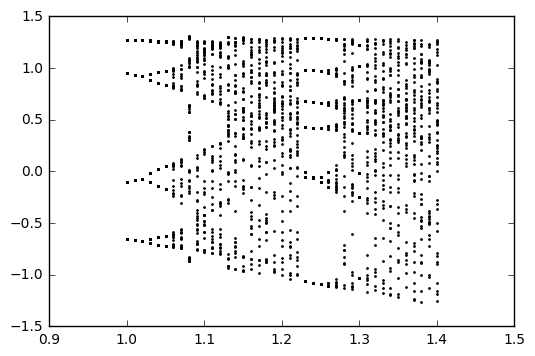

In [9]:
for a, xs in zip(aa, xxs):
    plt.scatter([a]*n_store, xs, s=1)

**3**. Collatz numbers - Euler project problem 14. (25 points)

The following iterative sequence is defined for the set of positive integers:
```
n → n/2 (n is even)
n → 3n + 1 (n is odd)
```
Using the rule above and starting with 13, we generate the following sequence:
```
13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
```
It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

- Write a function to generate the iterative sequence described (15 points)
- Which starting number, under one million, produces the longest chain? (10 points)

NOTE: Once the chain starts the terms are allowed to go above one million.

In [10]:
# Your answer here

def collatz(n):
    """Returns Collatz sequence starting with n."""

    seq = [n]
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3*n + 1
        seq.append(n)
    return seq

#### Generator version

In [11]:
def collatz_count(n):
    """Returns Collatz sequence starting with n."""

    count  = 1
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3*n + 1
        count += 1
    return count

In [12]:
%%time

best_n = 1
best_length = 1
for n in range(2, 1000000):
    length = len(collatz(n))
    if length > best_length:
        best_length  = length
        best_n = n    
        
print(best_n, best_length)

837799 525
CPU times: user 39 s, sys: 32 ms, total: 39 s
Wall time: 39.1 s


#### A simple optimization 

Ignore starting numbers that have been previously generated since they cannot be longer than the generating sequence.

In [13]:
%%time

best_n = 1
best_length = 1
seen = set([])

for n in range(2, 1000000):
    if n in seen:
        continue
 
    seq = collatz(n)
    seen.update(seq)
    length = len(seq)
    if length > best_length:
        best_length  = length
        best_n = n    
        
print(best_n, best_length)

837799 525
CPU times: user 21.1 s, sys: 128 ms, total: 21.2 s
Wall time: 21.2 s


**4**. Reading Ulysses. (30 points)

- Write a program to download the text of [Ulysses](http://www.gutenberg.org/files/4300/4300-0.txt) (5 points)
- Open the downloaded file and read the entire sequence into a single string variable called `text`, discarding the header information (i.e. text should start with `\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ULYSSES ***\n\n\n\n\n`). Also remove the footer information (i.e. text should not include anything from `End of the Project Gutenberg EBook of Ulysses, by James Joyce`). (10 points)
- Find and report the starting index (counting from zero) and length of the longest word in `text`. For simplicity, a word is defined here to be any sequence of characters with no space between the characters (i.e. a word may include punctuation or numbers, just not spaces). If there are ties, report the starting index and length of the last word found. For example, in "the quick brow fox jumps over the lazy dog." the longest word is `jumps` which starts at index 19 and has length 5, and 'dog.' would be considered a 4-letter word (15 points).

In [8]:
# Your answer here

import urllib.request
response = urllib.request.urlopen('http://www.gutenberg.org/files/4300/4300-0.txt')
text = response.read().decode()

```python
# Alternative version using requests library
# Although not officially part of the standard libaray,
# it is so widely used that the standard docs point to it
# "The Requests package is recommended for a higher-level HTTP client interface."

import requests

url = 'http://www.gutenberg.org/files/4300/4300-0.txt'
text = requests.get(url).text
```

In [21]:
with open('ulysses.txt', 'w') as f:
    f.write(text)

In [22]:
with open('ulysses.txt') as f:
    text = f.read()

start_string = '\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ULYSSES ***\n\n\n\n\n'
stop_string = 'End of the Project Gutenberg EBook of Ulysses, by James Joyce'
start_idx = text.find(start_string)
stop_idx = text.find(stop_string)
text = text[(start_idx + len(start_string)):stop_idx]

In [23]:
best_len = 0
best_word = ''
for word in set(text.split()):
    if len(word) > best_len:
        best_len = len(word)
        best_word = word

In [24]:
best_word

'Nationalgymnasiummuseumsanatoriumandsuspensoriumsordinaryprivatdocentgeneralhistoryspecialprofessordoctor'

#### We are looking for the last word found, so search backwards from the end with `rfind`

In [25]:
idx = text.rfind(best_word,)

In [26]:
idx, best_len

(602179, 105)

In [27]:
text[idx:(idx+best_len)]

'Nationalgymnasiummuseumsanatoriumandsuspensoriumsordinaryprivatdocentgeneralhistoryspecialprofessordoctor'